In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Import the dust climatology data:

In [2]:
with open('Dust_LatLon_SecondPass_Bill.xlsx - Data LatLon.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)

Build the dust climatology dataframe:

In [3]:
dust_df = pd.read_csv('Dust_LatLon_SecondPass_Bill.xlsx - Data LatLon.csv')

#--- Converting the string datetime to actual datetime
dust_df['Date (YYYYMMDD)'] = pd.to_datetime(dust_df['Date (YYYYMMDD)'], format='%Y%m%d')

#--- Removing the dates not checked by me or Bill
dust_df = dust_df[(dust_df['Jesse Check'] == 'x') | (dust_df['Bill add'] == 'x')]

dust_df

,Date (YYYYMMDD),YYYY,M,D,latitude,longitude,start time (UTC),Jesse Check,Bill add,Notes,...,GOES Raw,GOES Images,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
24,2001-01-13,2001.0,1.0,13.0,33.89,-102.94,1800.0,NaN,x,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2001-01-16,2001.0,1.0,16.0,30.31,-107.47,1900.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,20010504.0,NaN,NaN,NaN,NaN,NaN
26,2001-01-16,2001.0,1.0,16.0,29.41,-106.88,1900.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,20010505.0,NaN,NaN,NaN,NaN,NaN
27,2001-01-16,2001.0,1.0,16.0,29.21,-106.12,1900.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,20010505.0,NaN,NaN,NaN,NaN,NaN
28,2001-01-16,2001.0,1.0,16.0,28.60,-106.51,1930.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,20010516.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,2020-12-23,2020.0,12.0,23.0,38.00,-101.7,1530.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3482,2020-12-29,2020.0,12.0,29.0,29.30,-106.8,1930.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3483,2020-12-29,2020.0,12.0,29.0,28.90,-106.9,1930.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3484,2020-12-29,2020.0,12.0,29.0,29.00,-104.8,2000.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter the dust climatology to a certain region: 

In [4]:
latitude_north = 31.9
latitude_south = 29.7
longitude_west = -108.7
longitude_east = -105

In [5]:
dust_df['latitude'] = pd.to_numeric(dust_df['latitude'], errors='coerce')
dust_df['longitude'] = pd.to_numeric(dust_df['longitude'], errors='coerce')

#--- Filter the DataFrame after dropping rows with NaN values in latitude and longitude columns
dust_df_region = dust_df.dropna(subset=['latitude', 'longitude'])
dust_df_region = dust_df_region[
    (dust_df_region['latitude'] >= latitude_south) & 
    (dust_df_region['latitude'] <= latitude_north) &
    (dust_df_region['longitude'] >= longitude_west) &
    (dust_df_region['longitude'] <= longitude_east)
]

Map the results of the filtered data: 

In [6]:
total_latitude_north = 43
total_latitude_south = 26
total_longitude_west = -124
total_longitude_east = -97

/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_8640/3358757756.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


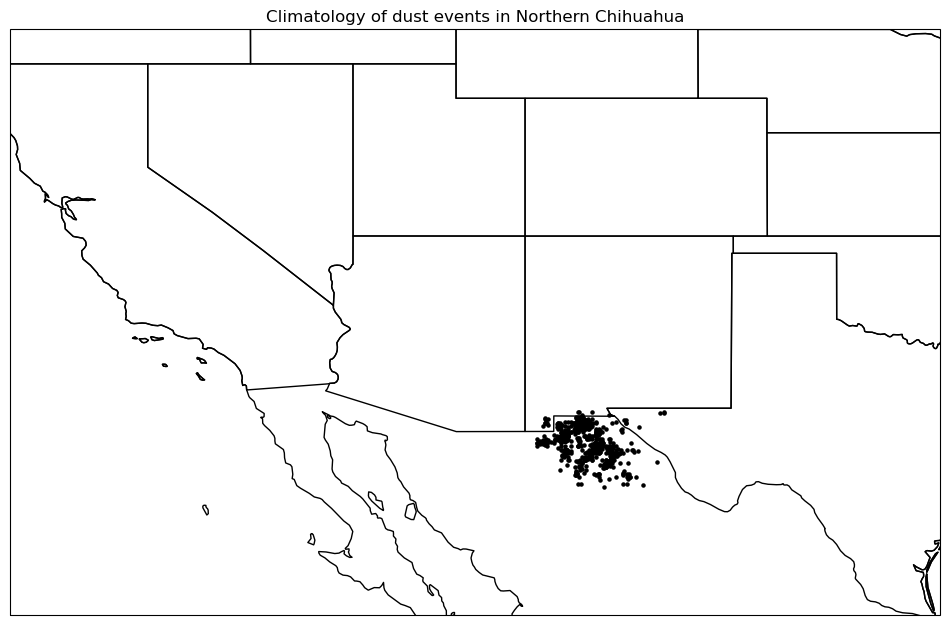

In [7]:
projection=ccrs.PlateCarree(central_longitude=0)
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

dust=ax.scatter(dust_df_region['longitude'], dust_df_region['latitude'], c='black', s=5)

ax.set_extent([total_longitude_west, total_longitude_east, total_latitude_south, total_latitude_north], crs=ccrs.PlateCarree())

ax.set_title("Climatology of dust events in Northern Chihuahua" )
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.STATES)

fig.show()

Creating a datetime field:

In [11]:
times = pd.to_timedelta(dust_df['start time (UTC)'].astype(str)[:-2].astype(int), unit='h')

dust_df['datetime'] = dust_df['Date (YYYYMMDD)'] + times

ValueError: invalid literal for int() with base 10: '1800.0'

In [28]:
dust_df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

24      2005-12-18 00:00:00
25      2006-03-31 00:00:00
26      2006-03-31 00:00:00
27      2006-03-31 00:00:00
28      2006-04-30 00:00:00
               ...         
3481    2025-03-02 00:00:00
3482    2026-04-12 00:00:00
3483    2026-04-12 00:00:00
3484    2026-06-21 00:00:00
3485    2026-09-29 00:00:00
Name: datetime, Length: 3214, dtype: object

Time figure of the dust events in Northern CHH:

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,4))

ax.set_xlabel('Datetime')
ax.set_ylabel('Temperature (C)')
ax.set_title('Water temperature at buoy 44008 in 2023')

ax.plot(range(len(wtmp_clean)), wtmp_clean, color='#000', linewidth=1)

plt.savefig('wtmp_44008.png', dpi = 300)
plt.show()